<a href="https://colab.research.google.com/github/abirahsan007/ai-lab/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
data_path = '/content/gdrive/MyDrive/ai lab files/Dataset/iris.csv'
my_data = genfromtxt(data_path, delimiter=',')

In [3]:
data = my_data.tolist()
for i in range(5):
  print(data[i])
type(data)

[5.1, 3.5, 1.4, 0.2, 0.0]
[4.9, 3.0, 1.4, 0.2, 0.0]
[4.7, 3.2, 1.3, 0.2, 0.0]
[4.6, 3.1, 1.5, 0.2, 0.0]
[5.0, 3.6, 1.4, 0.2, 0.0]


list

In [4]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [5]:
print(X.shape)
print(y.shape)
print(y)
ones=np.ones((150,1))
X = np.concatenate((ones,X), axis = 1) 


train_data,train_label = X[0:100],y[0:100]
val_data, val_label = X[100:125], y[100:125]
test_data, test_label = X[125:150], y[125:150]
#print(X)

(150, 2)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [6]:
np.random.seed(10)
def sigmoid(z):
    s = 1/(1+np.exp(-z))   
    return s
def log_loss(y,h) :    
    loss = -y*np.log(h)-(1-y)*np.log(1-h)   
    return loss
def initialize_theta():   
    return np.random.rand(3)


Training

In [25]:
training_loss = [] 
theta = initialize_theta() 
lr = .01
for i in range(1000) :
    
    Tj = 0
    for X,y in zip(train_data,train_label) :
        
        Z = np.dot(X,theta)
        h = sigmoid(Z)
        loss = log_loss(y,h) 
        dv = X*(h-y)
        theta = theta - dv*lr
        Tj = Tj+loss 
    Tj = Tj/len(X)
    training_loss.append(Tj) 


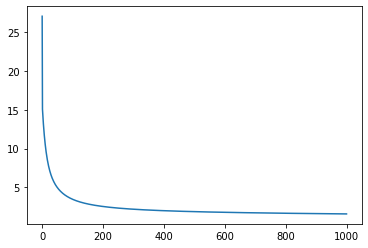

In [26]:
plt.plot(training_loss)

**Validation accuracy **

In [24]:
correct = 0
for X,y in zip(val_data,val_label) :
        
        Z = np.dot(X,theta) 
        h = sigmoid(Z) 
        #print(h)
        #print(y)
        if h>.5:
            h=1
        else :
            h=0
        if h==y :
            correct +=1
val_acc = correct/len(val_data)*100
print('acc is',val_acc)

acc is 100.0


Testing

In [27]:
testing_loss = [] 
theta = initialize_theta() 
lr = .1
for i in range(1000) :
    
    Tj = 0
    for X,y in zip(test_data,test_label) :
        
        Z = np.dot(X,theta)
        h = sigmoid(Z)
        loss = log_loss(y,h) 
        dv = X*(h-y)
        theta = theta - dv*lr
        Tj = Tj+loss 
    Tj = Tj/len(X)
    testing_loss.append(Tj) 

**Test accuracy**

In [28]:
correct = 0
for X,y in zip(test_data,test_label) :
        
        Z = np.dot(X,theta)
        h = sigmoid(Z)
        #print(h)
        #print(y)
        if h>.5:
            h=1
        else :
            h=0
        if h==y :
            correct +=1
test_acc = correct/len(test_data)*100
print("test accuracy :",test_acc)

test accuracy : 100.0
